In [1]:
from transformers import BertForSequenceClassification

In [3]:
aa = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [14]:
aa.bert.encoder

BertEncoder(
  (layer): ModuleList(
    (0): BertLayer(
      (attention): BertAttention(
        (self): BertSelfAttention(
          (query): Linear(in_features=768, out_features=768, bias=True)
          (key): Linear(in_features=768, out_features=768, bias=True)
          (value): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (output): BertSelfOutput(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (intermediate): BertIntermediate(
        (dense): Linear(in_features=768, out_features=3072, bias=True)
      )
      (output): BertOutput(
        (dense): Linear(in_features=3072, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      

In [25]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [26]:
print(loss)
print(logits)
print(inputs)
print(outputs)

tensor(1.1395, grad_fn=<NllLossBackward>)
tensor([[ 0.4396, -0.3142]], grad_fn=<AddmmBackward>)
{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
SequenceClassifierOutput(loss=tensor(1.1395, grad_fn=<NllLossBackward>), logits=tensor([[ 0.4396, -0.3142]], grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)


In [27]:
inputs["output_attentions"] = True

In [28]:
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]]), 'output_attentions': True}

In [29]:
outputs = model(**inputs, labels=labels)

In [33]:
print(len(outputs.attentions))
print(outputs.attentions)

12
(tensor([[[[9.0296e-02, 6.9243e-02, 7.3392e-02, 8.9108e-02, 8.0291e-02,
           7.6057e-02, 8.2084e-02, 4.3953e-01],
          [1.0125e-01, 1.2449e-01, 5.4100e-02, 1.9214e-01, 1.4682e-01,
           7.9260e-02, 1.4916e-01, 1.5278e-01],
          [1.1432e-01, 1.2739e-01, 9.8221e-02, 1.0652e-01, 1.2987e-01,
           1.3673e-01, 1.3251e-01, 1.5444e-01],
          [1.2933e-01, 1.3602e-01, 1.0787e-01, 1.9477e-01, 7.4443e-02,
           1.0373e-01, 9.9448e-02, 1.5438e-01],
          [9.1956e-02, 1.3686e-01, 6.7371e-02, 1.2035e-01, 1.3754e-01,
           8.1651e-02, 3.0727e-01, 5.7016e-02],
          [1.7998e-01, 1.0882e-01, 1.5925e-01, 1.8181e-01, 9.0457e-02,
           1.4357e-01, 8.2150e-02, 5.3962e-02],
          [9.3204e-02, 1.2712e-01, 1.0409e-01, 1.9596e-01, 1.4126e-01,
           9.9544e-02, 1.4478e-01, 9.4043e-02],
          [1.2596e-01, 7.3092e-02, 1.8062e-01, 1.4630e-01, 7.9516e-02,
           9.8920e-02, 9.6309e-02, 1.9929e-01]],

         [[4.3272e-01, 1.1681e-03, 5.4133e

In [63]:
sample_no = 0
word_no = 0
nheads = 12
print(outputs.attentions[-1].shape)
print("\nacross head and words")
# attention for one word in one layer across all heads
print(outputs.attentions[-1][sample_no, :, word_no, :].shape)
print(outputs.attentions[-1][sample_no, :, word_no, :])
print("\nacross heads sum")
# attention for one word in one layer summed across all heads
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=-1).shape)
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=-1))
print("\nacross words sum")
# attention for one word in one layer summed across all words
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0).shape)
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0))
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0)/nheads)
print("\nwords across words sum")
# attention for every word in one layer summed across all words
print(outputs.attentions[-1][sample_no, :, :, :].sum(axis=0).shape)
print(outputs.attentions[-1][sample_no, :, :, :].sum(axis=0))
print(outputs.attentions[-1][sample_no, :, :, :].sum(axis=0)/nheads)
print(outputs.attentions[-1][sample_no, :, :, :].sum(axis=0).sum(1))
print(outputs.attentions[-1][sample_no, :, :, :].sum(axis=0).sum(0))
print()
# total attention sum should be 12.
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0).sum()/nheads)

# print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=-1))


torch.Size([1, 12, 8, 8])

across head and words
torch.Size([12, 8])
tensor([[0.2543, 0.0620, 0.0637, 0.0610, 0.0166, 0.0335, 0.0246, 0.4842],
        [0.3207, 0.0396, 0.0462, 0.0699, 0.1462, 0.0480, 0.0515, 0.2778],
        [0.1303, 0.1453, 0.0589, 0.0858, 0.0315, 0.1985, 0.1123, 0.2374],
        [0.0770, 0.1583, 0.1424, 0.1281, 0.0932, 0.1176, 0.1143, 0.1691],
        [0.1011, 0.0741, 0.0873, 0.0788, 0.2286, 0.2038, 0.1594, 0.0669],
        [0.0698, 0.0796, 0.0488, 0.0702, 0.4527, 0.0516, 0.0660, 0.1612],
        [0.2717, 0.0408, 0.0537, 0.0651, 0.0346, 0.1298, 0.2486, 0.1556],
        [0.0468, 0.0560, 0.0485, 0.0186, 0.0509, 0.0336, 0.0332, 0.7122],
        [0.1022, 0.0307, 0.0383, 0.0361, 0.1021, 0.3271, 0.3257, 0.0378],
        [0.2002, 0.1373, 0.2152, 0.1159, 0.0511, 0.1966, 0.0530, 0.0307],
        [0.0927, 0.1228, 0.1226, 0.1100, 0.0249, 0.0598, 0.0673, 0.4000],
        [0.0126, 0.0378, 0.0171, 0.0419, 0.0322, 0.0225, 0.0189, 0.8170]],
       grad_fn=<SliceBackward>)

across he

In [43]:
import seaborn as sns

<AxesSubplot:>

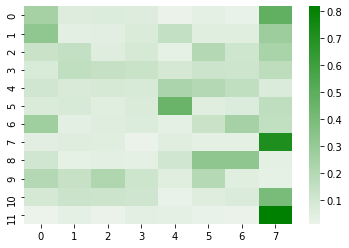

In [48]:
sns.heatmap(outputs.attentions[-1][sample_no, :, word_no, :].detach().numpy(), 
            cmap=sns.light_palette("green", as_cmap=True))

tensor([[1.6796, 0.9843, 0.9427, 0.8815, 1.2646, 1.4223, 1.2750, 3.5501]],
       grad_fn=<SliceBackward>)


<AxesSubplot:>

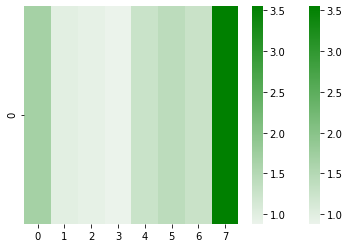

In [68]:
print(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0)[None, :])
sns.heatmap(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0)[None, :].detach().numpy(), 
            cmap=sns.light_palette("green", as_cmap=True))
# sns.heatmap(outputs.attentions[-1][sample_no, :, word_no, :].sum(axis=0)[None, :].detach().numpy(), 
#             cmap=sns.light_palette("green", as_cmap=True))

In [ ]:
def plot_attn_cls_last_layer(model, input):
    pass

def plot_attn_cls_all_layers():
    pass


In [75]:
inp_temp = tokenizer(["Hello, my dog is cute"]*2, return_tensors="pt")
inp_temp["output_attentions"] = True
print(inp_temp)
labels = torch.tensor([1, 1]).unsqueeze(0)  # Batch size 2
out_temp = model(**inp_temp, labels=labels)

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102],
        [  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]]), 'output_attentions': True}


In [78]:
out_temp.attentions[-1].shape

torch.Size([2, 12, 8, 8])